# 决策树


## 1、sklearn中的决策树

- 模块sklearn.tree（主讲分类树）

| 类   | 名称   |
| ----- | -----|
|tree.DecisionTreeClassifier	|分类树|
|tree.DecisionTreeRegressor	|回归树
|tree.export_graphviz	|将生成的决策树导出为DOT格式，画图专用|
|tree.ExtraTreeClassifier|	高随机版本的分类树|
|tree.ExtraTreeRegressor	|高随机版本的回归树|

- sklearn基本建模流程
![](../imgs/modelingprocess.webp)

   - 对应代码
    ```python
    from sklearn import tree                                #导入需要的模块

    clf = tree.DecisionTreeClassifier()                     #实例化
    clf = clf.fit(X_train,y_train)                          #用训练集数据训练模型（训练样本必须是二维（特征）及以上，不能一维（一个特征），一维需要增维）
    result = clf.score(X_test,y_test)                       #导入测试集，从接口中调用需要的信息

    ```


## 2、DecisionTreeClassifier

`class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)`

### 2.1 重要参数

#### 2.1.1 criterion

为了要将表格转化为一棵树，决策树需要找出最佳节点和最佳的分枝方法，对分类树来说，衡量这个“最佳”的指标叫做“不纯度”。通常来说，不纯度越低，决策树对训练集的拟合越好。现在使用的决策树算法在分枝方法上的核心大多是围绕在对某个不纯度相关指标的最优化上。

不纯度基于节点来计算，树中的每个节点都会有一个不纯度，并且子节点的不纯度一定是低于父节点的，也就是说，在同一棵决策树上，叶子节点的不纯度一定是最低的。

Criterion这个参数正是用来决定不纯度的计算方法的。sklearn提供了两种选择：
- 1）输入”entropy“，使用信息熵（Entropy）
- 2）输入”gini“，使用基尼系数（Gini Impurity）
     ![](../imgs/gini.svg)
其中t代表给定的节点，i代表标签的任意分类，代表标签分类i在节点t上所占的比例。注意，当使用信息熵时，sklearn实际计算的是基于信息熵的信息增益(Information Gain)，即父节点的信息熵和子节点的信息熵之差。

比起基尼系数，信息熵对不纯度更加敏感，对不纯度的惩罚最强。但是**在实际使用中，信息熵和基尼系数的效果基本相同**。信息熵的计算比基尼系数缓慢一些，因为基尼系数的计算不涉及对数。另外，因为信息熵对不纯度更加敏感，所以信息熵作为指标时，决策树的生长会更加“精细”，因此对于高维数据或者噪音很多的数据，信息熵很容易过拟合，基尼系数在这种情况下效果往往比较好。当然，这不是绝对的。


| 参数   | criterion   |
| ------------------- | ----------------------|
|如何影响模型?	|确定不纯度的计算方法，帮忙找出最佳节点和最佳分枝，不纯度越低，决策树对训练集的拟合越好|
|可能的输入有哪些？	|不填默认基尼系数，填写gini使用基尼系数，填写entropy使用信息增益|
|怎样选取参数？	|通常就使用基尼系数<br>数据维度很大，噪音很大时使用基尼系数<br>维度低，数据比较清晰的时候 信息熵和基尼系数没区别 <br>当决策树的拟合程度不够的时候，使用信息熵<br>两个都试试，不好就换另外一个|

![](../imgs/decisiontree.webp)

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

#### 决策树示例

In [4]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
# 特征数据
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine.data.shape

(178, 13)

In [7]:
# 分类结果
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# 特征名
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
# 分类名
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
# 合并数据
pd.concat([pd.DataFrame(wine.data, columns=wine.feature_names), pd.DataFrame(wine.target, columns=['classed'])], axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classed
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [11]:
# 分训练集和测试集(30%测试集，70%训练集)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(124, 13) (54, 13) (124,) (54,)


In [58]:
# 建立模型
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)  # 返回预测的准确度accuracy
score

0.9259259259259259

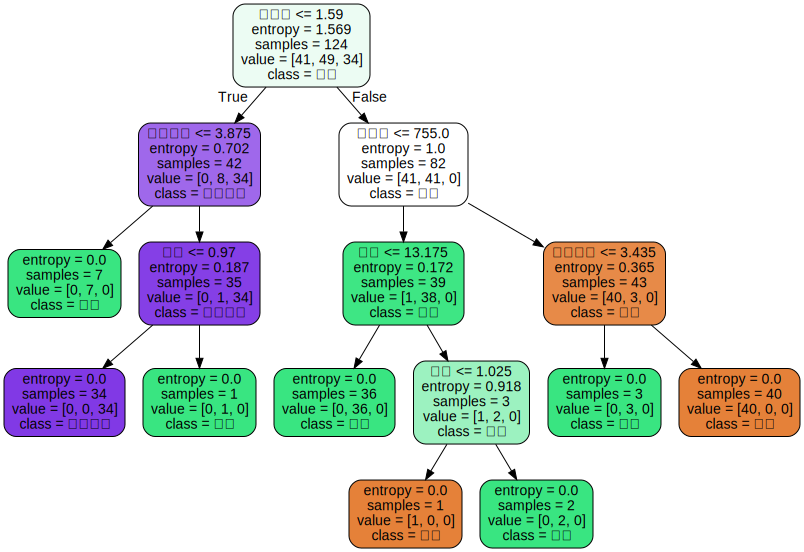

In [59]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True  # 是否填充颜色
                                ,rounded=True  # 圆框
                                )
graph = graphviz.Source(dot_data)
graph

- 注解
    - 第一行是特征
    - 第二行是不纯度，越往下不纯度entropy越小
    - 第三行是当前节点的样本数
    - 第四行是各类的占比数量
    - 第五行是占比数量最高的类别
- 可以看出决策树没有使用全部特征

In [57]:
#特征重要性(使用的特征，贡献度越高，越处于上面)
clf.feature_importances_

[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.034484105274165476),
 ('苹果酸', 0.0),
 ('灰', 0.033670644142385034),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.42691176514570783),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.19864601888477298),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3062874665529687)]

我们已经在只了解一个参数的情况下，建立了一棵完整的决策树。但是回到步骤4建立模型，score会在某个值附近波动，引起步骤5中画出来的每一棵树都不一样。它为什么会不稳定呢？如果使用其他数据集，它还会不稳定吗？

我们之前提到过，无论决策树模型如何进化，在分枝上的本质都还是追求某个不纯度相关的指标的优化，而正如我们提到的，不纯度是基于节点来计算的，也就是说，决策树在建树时，是靠优化节点来追求一棵优化的树，但最优的节点能够保证最优的树吗？集成算法被用来解决这个问题：sklearn表示，既然一棵树不能保证最优，那就建更多的不同的树，然后从中取最好的。怎样从一组数据集中建不同的树？在每次分枝时，不从使用全部特征，而是随机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了。

#### 2.1.2、random_state & splitter

- random_state

    用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。

- splitter

    也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合。

In [108]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=1, 
                                  splitter='random'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度

score

0.9814814814814815

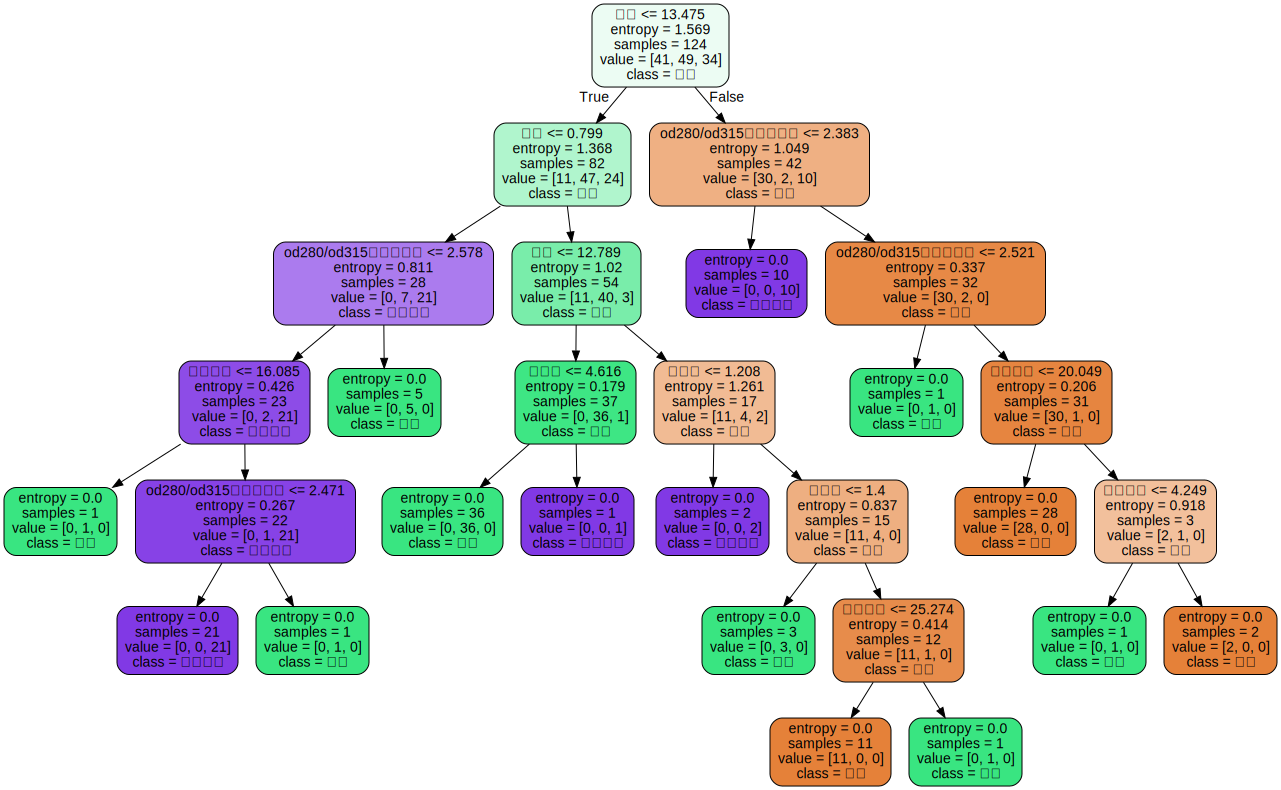

In [94]:
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True  # 是否填充颜色
                                ,rounded=True  # 圆框
                                )
graph = graphviz.Source(dot_data)
# 树明显变多了
graph

#### 2.1.3、剪枝参数

在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树往往会过拟合，这就是说，它会在训练集上表现很好，在测试集上却表现糟糕。我们收集的样本数据不可能和整体的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪声，并使它对未知数据的拟合程度不足。

为了让决策树有更好的泛化性，我们要对决策树进行剪枝。**剪枝策略对决策树的影响巨大，正确的剪枝策略是优化决策树算法的核心**。sklearn为我们提供了不同的剪枝策略：

- max_depth
    
    限制树的最大深度，超过设定深度的树枝全部剪掉

    这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效果再决定是否增加设定深度。

- min_samples_leaf & min_samples_split
    - min_samples_leaf限定
    
    一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生
一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择。（也就是每个子节点的样本数必须大于min_samples_leaf个，否则不分支）

    - min_samples_split限定
    
    一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。(也就是当前节点必须有min_samples_split个样本才再往下分支，否则结束分支)


In [95]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

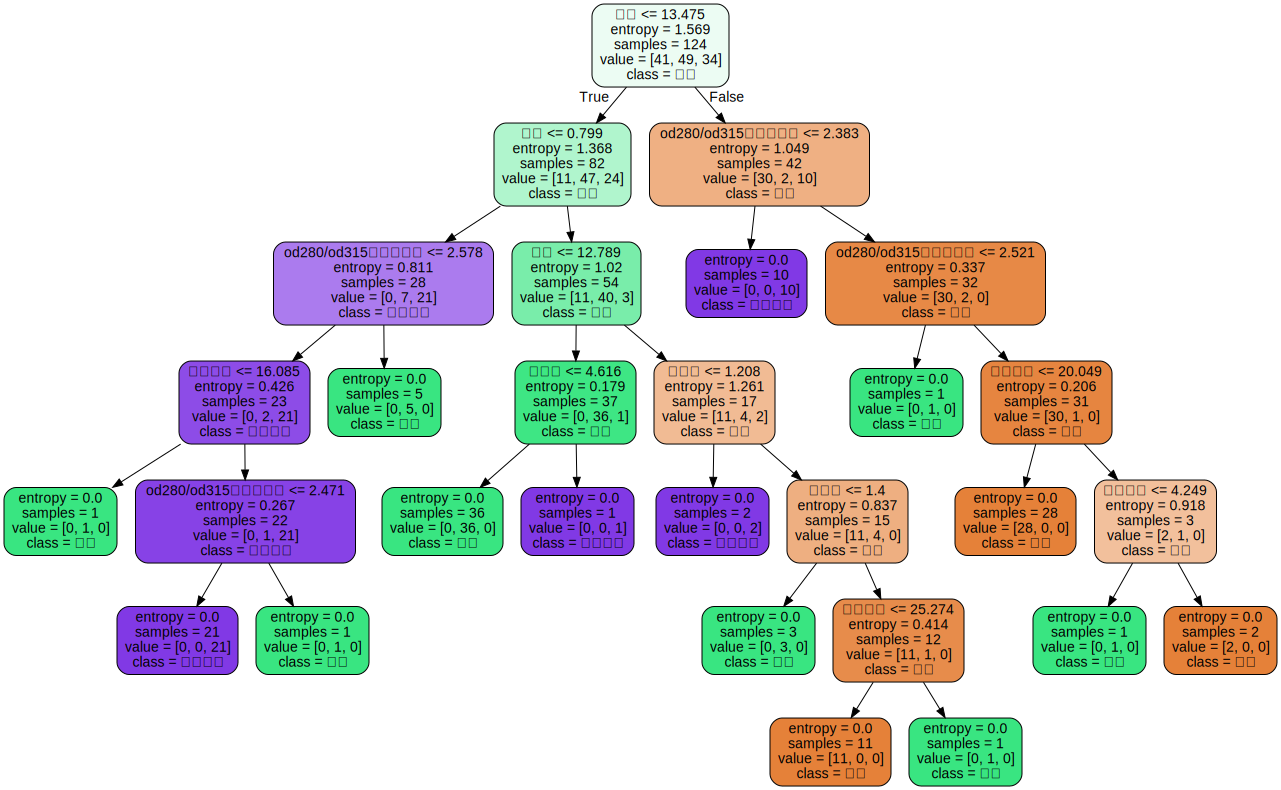

In [131]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=1
                                  ,splitter="random"
                                  ,max_depth=6
#                                   ,min_samples_leaf=10
#                                   ,min_samples_split=20
                                 )

clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [132]:
score = clf.score(Xtest, Ytest) #返回预测的准确度

score

0.9814814814814815

- max_features & min_impurity_decrease
    
    一般max_depth使用，用作树的”精修“

    - max_features
    
    限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。

    - min_impurity_decrease
    
    限制信息增益的大小，信息增益小于设定数值的分枝不会发生。这是在0.19版本种更新的功能，在0.19版本之前时使用min_impurity_split。

- 确认最优的剪枝参数

     那具体怎么来确定每个参数填写什么值呢？这时候，我们就要使用确定超参数的曲线来进行判断了，继续使用我们已经训练好的决策树模型clf。超参数的学习曲线，是一条以超参数的取值为横坐标，模型的度量指标为纵坐标的曲线，它是用来衡量不同超参数取值下模型的表现的线。在我们建好的决策树里，我们的模型度量指标就是score。


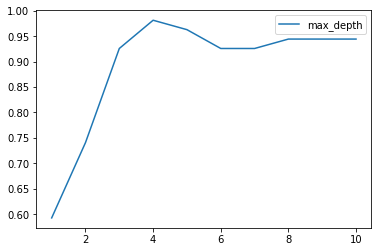

In [13]:
# 学习曲线
score_ret = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=1
                                  ,splitter="random"
                                  ,max_depth=i + 1
                                 )
    clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    score_ret.append(score)
plt.plot(range(1, 11), score_ret, label="max_depth")
plt.legend()
plt.show()

思考：

- 剪枝参数一定能够提升模型在测试集上的表现吗？ - 调参没有绝对的答案，一切都是看数据本身。

- 这么多参数，一个个画学习曲线？

无论如何，剪枝参数的默认值会让树无尽地生长，这些树在某些数据集上可能非常巨大，对内存的消耗。所以如果你手中的数据集非常大，你已经预测到无论如何你都是要剪枝的，那提前设定这些参数来控制树的复杂性和大小会比较好。

#### 2.1.4、目标权重参数

- class_weight & min_weight_fraction_leaf（用得少）

    完成样本标签平衡的参数。样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例。比如说，在银行要判断“一个办了信用卡的人是否会违约”，就是是vs否（1%：99%）的比例。这种分类状况下，即便模型什么也不做，全把结果预测成“否”，正确率也能有99%。因此我们要使用class_weight参数对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重。

    有了权重之后，样本量就不再是单纯地记录数目，而是受输入的权重影响了，因此这时候剪枝，就需要搭配min_ weight_fraction_leaf这个基于权重的剪枝参数来使用。另请注意，基于权重的剪枝参数（例如min_weight_ fraction_leaf）将比不知道样本权重的标准（比如min_samples_leaf）更少偏向主导类。如果样本是加权的，则使用基于权重的预修剪标准来更容易优化树结构，这确保叶节点至少包含样本权重的总和的一小部分。


### 2.2、重要属性和接口

属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说，最重要的是feature_importances_，能够查看各个特征对模型的重要性。

sklearn中许多算法的接口都是相似的，比如说我们之前已经用到的fit和score，几乎对每个算法都可以使用。除了这两个接口之外，决策树最常用的接口还有apply和predict。apply中输入测试集返回每个测试样本所在的叶子节点的索引，predict输入测试集返回每个测试样本的标签。返回的内容一目了然并且非常容易，大家感兴趣可以自己下去试试看。

至此，分类树DecisionTreeClassifier和用决策树绘图（export_graphviz）的所有基础和决策树的基本流程已基本走完；分类树的七个参数，一个属性，四个接口，以及绘图所用的代码。

- 七个参数：
    - Criterion
    - 两个随机性相关的参数（random_state，splitter）
    - 四个剪枝参数（max_depth, ，min_sample_leaf，max_feature，min_impurity_decrease）
- 一个属性：
    - feature_importances_
- 四个接口：
    - fit
    - score
    - apply
    - predict


In [16]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([ 5, 16, 32, 19, 16,  5, 11, 16, 19, 16,  5, 25,  5, 23,  5, 32,  5,
       11, 31, 19, 32, 32, 16, 19,  7, 31, 31, 32, 31, 32, 16, 19, 31, 32,
       31, 11, 32, 16,  5, 16,  5, 32, 31, 27, 16, 32, 11, 32,  5, 19, 31,
        7, 32, 32], dtype=int64)

In [17]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0,
       1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 1, 0, 2, 1, 2, 2, 0, 0])

## 3、DecisionTreeRegressor

`class sklearn.tree.DecisionTreeRegressor(criterion='mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)`

几乎所有参数，属性及接口都和分类树一模一样。需要注意的是，在回归树中，没有标签分布是否均衡的问题，一次没有class_weight这样的参数。

### 3.1 重要参数，属性及接口

#### 3.1.1 criterion

回归树衡量分枝质量的指标，支持的标准有三种：

- 1）输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为
特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失
- 2）输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差
- 3）输入"mae"使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失
属性中最重要的依然是feature_importances_，接口依然是apply, fit, predict, score最核心。

     ![](../imgs/mse.png)
其中N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi是样本点i实际的数值标签。所以MSE的本质，
其实是样本真实数据与回归结果的差异。**在回归树中，MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡
量回归树回归质量的指标**，当我们在使用交叉验证，或者其他方式获取回归树的结果时，我们往往选择均方误差作
为我们的评估（在分类树中这个指标是score代表的预测准确率）。在回归中，我们追求的是，MSE越小越好。

然而，**回归树的接口score返回的是R平方（R平方越接近1表示模型越好），并不是MSE。**R平方被定义如下：
     ![](../imgs/R2-u.png)
其中u是残差平方和（MSE * N），v是总平方和，N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi
是样本点i实际的数值标签。y帽是真实数值标签的平均数。R平方可以为正为负（如果模型的残差平方和远远大于
模型的总平方和，模型非常糟糕，R平方就会为负），而均方误差永远为正。

值得一提的是，**虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误
差“（neg_mean_squared_error）。**这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均
方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的
均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#### 交叉验证
- cross_val_score

    交叉验证是用来观察模型的稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份
    作为训练集，多次计算模型的精确性来评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此
    用交叉验证n次的结果求出的平均值，是对模型效果的一个更好的度量。
    - 5个重要的参数
```
    cross_val_score(
        estimator,     // 模型评估器（实例化后的模型），
                        可以是分类，可以是回归，还可以是SVM，随机森林等任何实例化后的算法模型
        X,           // 完整的不需要分测试集合训练集的特征矩阵
        y=None,       // 完整的标签
        groups=None,
        scoring=None,    //指定衡量模型的参数，不填对于回归来说默认返回R平方，
                       但是会归一般使用负的均分误差，即scoring="neg_mean_squared_error"
        cv='warn',      // 迭代次数，比如5，分成4分做训练集，1分做测试集
        n_jobs=None,
        verbose=0,
        fit_params=None,
        pre_dispatch='2*n_jobs',
        error_score='raise-deprecating',
    )
```

    ![](../imgs/cross_val_score.png)

In [14]:
boston  = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, 
                boston.data, 
                boston.target, 
                cv=10, 
                scoring="neg_mean_squared_error")

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

### 3.2 回归树实例：一维回归的图像绘制

接下来我们到二维平面上来观察决策树是怎样拟合一条曲线的。我们用回归树来拟合正弦曲线，并添加一些噪声来
观察回归树的表现。

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

##### 创建一条含有噪声的正弦曲线
在这一步，我们的基本思路是，先创建一组随机的，分布在0~5上的横坐标轴的取值(x)，然后将这一组值放到sin函
数中去生成纵坐标的值(y)，接着再到y上去添加噪声。全程我们会使用numpy库来为我们生成这个正弦曲线。

In [38]:
rng = np.random.RandomState(1)  # 生成随机数种子
# 这里为什么生成二维的，因为之前说过fit接口不允许导入一维数据（特征）所以直接生成二维的（省去后面变成二维）
X = np.sort(5 * rng.rand(80, 1), axis=0)   # 生成排序
y = np.sin(X).ravel()                      # X是二维的np.sin计算出来的也是二维，需要使用ravel降成一维
y[::5] += 3 * (0.5 - rng.rand(16))         # 每隔5个数据添加噪声(间隔5，取出16个数，随机生成16个数)
                                            # rand生成：0-1之间的数，0.5减去：-0.5到0.5之间，再乘以3：-1.5到1.5之间的数

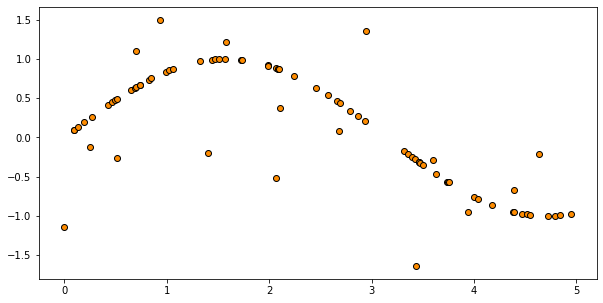

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='darkorange', edgecolors='black', label='data')

##### 实例化和训练模型

In [43]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

##### 测试集导入模型，预测结果

In [45]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]  # 必须二维需要增维

In [65]:
#了解增维切片np.newaxis的用法
l = np.array([1,2,3,4])
print(
    l.shape,
    l[:,np.newaxis] ,
    l[:,np.newaxis].shape,
    l[np.newaxis,:].shape,
    sep='\n'*3)

(4,)


[[1]
 [2]
 [3]
 [4]]


(4, 1)


(1, 4)


In [67]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

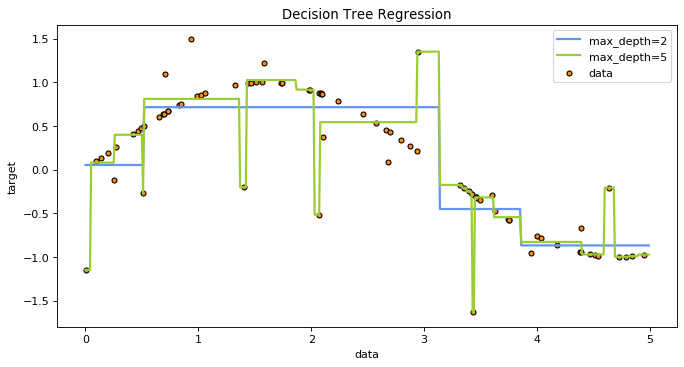

In [80]:
plt.figure(figsize=(10,5),dpi=80)
plt.scatter(X, y ,s=20, edgecolors='black', color='darkorange', label='data')
plt.plot(X_test, y_1,color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_2,color='yellowgreen', label='max_depth=5', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

可见，回归树学习了近似正弦曲线的局部线性回归。我们可以看到，如果树的最大深度（由max_depth参数控制）
设置得太高，则决策树学习得太精细，它从训练数据中学了很多细节，包括噪声得呈现，从而使模型偏离真实的正
弦曲线，形成过拟合。

## 4、决策树的优缺点
- 决策树优点
    - 1. 易于理解和解释，因为树木可以画出来被看见
    - 2. 需要很少的数据准备。其他很多算法通常都需要数据规范化，需要创建虚拟变量并删除空值等。但请注意，
    sklearn中的决策树模块不支持对缺失值的处理。
    - 3. 使用树的成本（比如说，在预测数据的时候）是用于训练树的数据点的数量的对数，相比于其他算法，这是
    一个很低的成本。
    - 4. 能够同时处理数字和分类数据，既可以做回归又可以做分类。其他技术通常专门用于分析仅具有一种变量类
    型的数据集。
    - 5. 能够处理多输出问题，即含有多个标签的问题，注意与一个标签中含有多种标签分类的问题区别开
    - 6. 是一个白盒模型，结果很容易能够被解释。如果在模型中可以观察到给定的情况，则可以通过布尔逻辑轻松
    解释条件。相反，在黑盒模型中（例如，在人工神经网络中），结果可能更难以解释。
    - 7. 可以使用统计测试验证模型，这让我们可以考虑模型的可靠性。
    - 8. 即使其假设在某种程度上违反了生成数据的真实模型，也能够表现良好。
- 决策树的缺点
    - 1. 决策树学习者可能创建过于复杂的树，这些树不能很好地推广数据。这称为过度拟合。修剪，设置叶节点所
    需的最小样本数或设置树的最大深度等机制是避免此问题所必需的，而这些参数的整合和调整对初学者来说
    会比较晦涩
    - 2. 决策树可能不稳定，数据中微小的变化可能导致生成完全不同的树，这个问题需要通过集成算法来解决。
    - 3. 决策树的学习是基于贪婪算法，它靠优化局部最优（每个节点的最优）来试图达到整体的最优，但这种做法
    不能保证返回全局最优决策树。这个问题也可以由集成算法来解决，在随机森林中，特征和样本会在分枝过
    程中被随机采样。
    - 4. 有些概念很难学习，因为决策树不容易表达它们，例如XOR，奇偶校验或多路复用器问题。
    - 5. 如果标签中的某些类占主导地位，决策树学习者会创建偏向主导类的树。因此，建议在拟合决策树之前平衡
    数据集。


## 5、附录

### 5.1、分类树参数列表



### 5.2、分类树属性列表



### 5.3、分类树接口列表


